<a href="https://colab.research.google.com/github/ygapratma/goSecure/blob/master/Prediksi_produksi_beras_di_pulau_sumatra_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dataset**

In [ ]:
#import library package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASET/Data_Tanaman_Padi_Sumatera_version_1.csv")
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [ ]:
data.shape

(224, 7)


Total data yang ada adalah 224 dengan setiap provinsi memiliki 28 data tahunan.

Dataset ini terdiri dari atribut-atribut berikut:

- Provinsi: Nama provinsi
- Tahun: Tahun produksi padi
- Produksi: Hasil produksi atau panen tahunan (ton)
- Luas Tanah: Luas area pertanian (hektar)
- Curah Hujan: Jumlah rata-rata curah hujan dalam setahun
  (milimeter)
- Kelembaban: Tingkat kelembaban rata-rata dalam setahun
  (persentase)
- Suhu Rata-rata: Derajat suhu rata-rata dalam setahun
  (celcius)

Atribut nomor 1 - 4 dikumpulkan dari Database Badan Pusat Statistik Indonesia, dan atribut lainnya dikumpulkan dari Database Badan Meteorologi, Klimatologi, dan Geofisika Indonesia.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


**2. Exploratory Data Analysis (EDA)**

In [ ]:
data.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [ ]:
# Menampilkan statistik deskriptif
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


Rata-rata hasil panen di 8 provinsi selama 28 tahun adalah 1.679.700,887 ton, dengan hasil panen terendah sebesar 42.938 ton dan yang tertinggi sebesar 4.881.089 ton. Rata-rata luas lahan pertanian adalah 374.350 hektar.

Dari deskripsi data di atas, dapat dilihat bahwa nilai rata-rata dan median dari setiap atribut tidak terlalu berbeda. Dengan demikian, dapat dikatakan bahwa data ini memiliki distribusi normal.

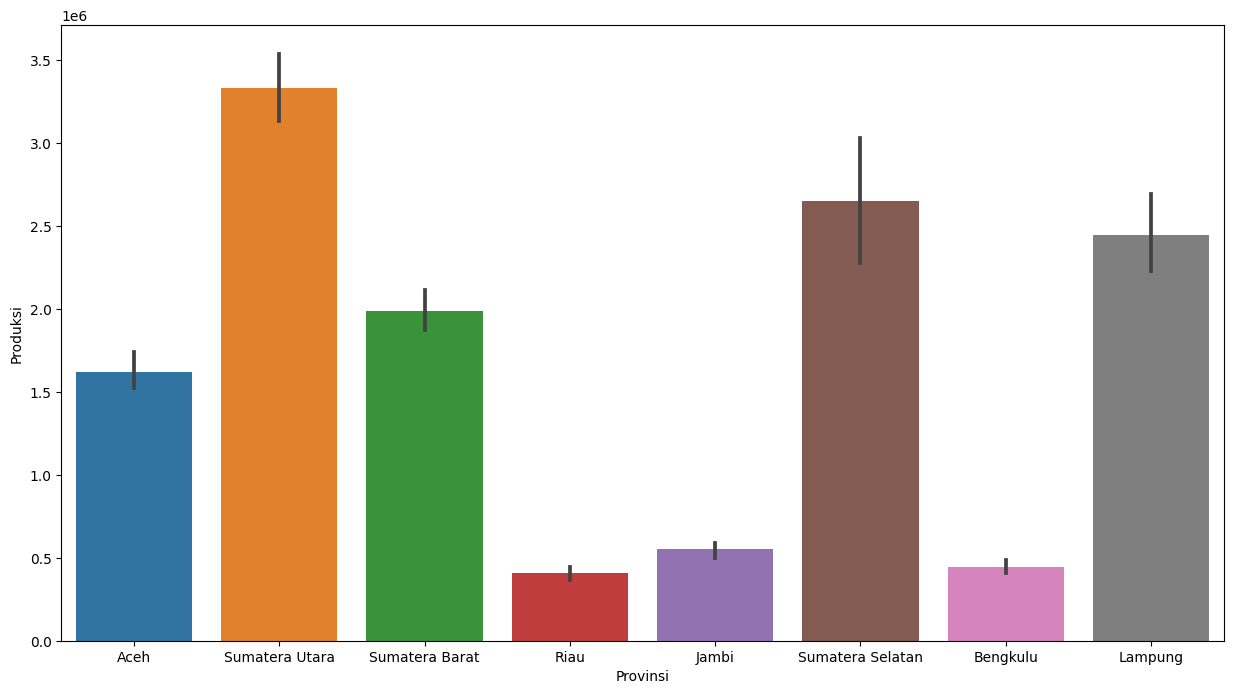

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Provinsi',y='Produksi', data=data)
plt.show()

Sumatera Utara Memiliki hasil panen yang paling tinggi

In [ ]:
pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


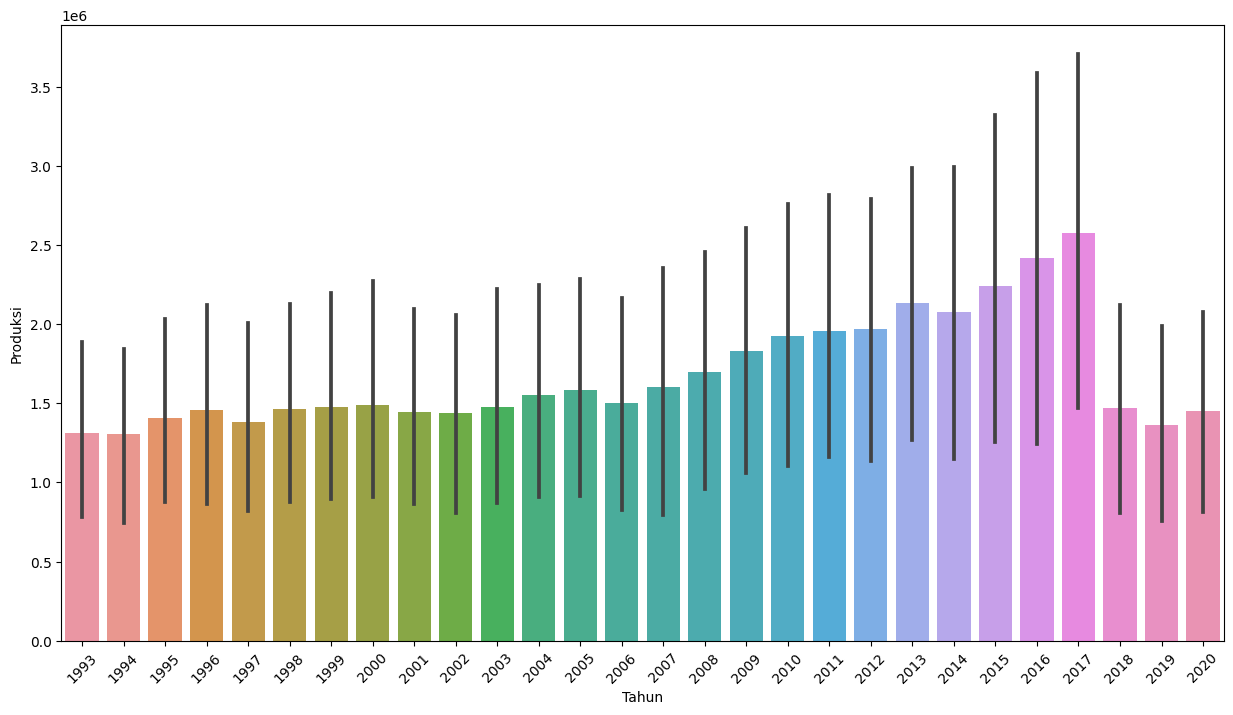

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Tahun',y='Produksi',data=data)
plt.xticks(rotation=45)
plt.show()

Tahun dengan produksi terbesar adalah pada tahun 2017, tetapi pada tahun-tahun berikutnya produksinya mengalami penurunan yang signifikan.

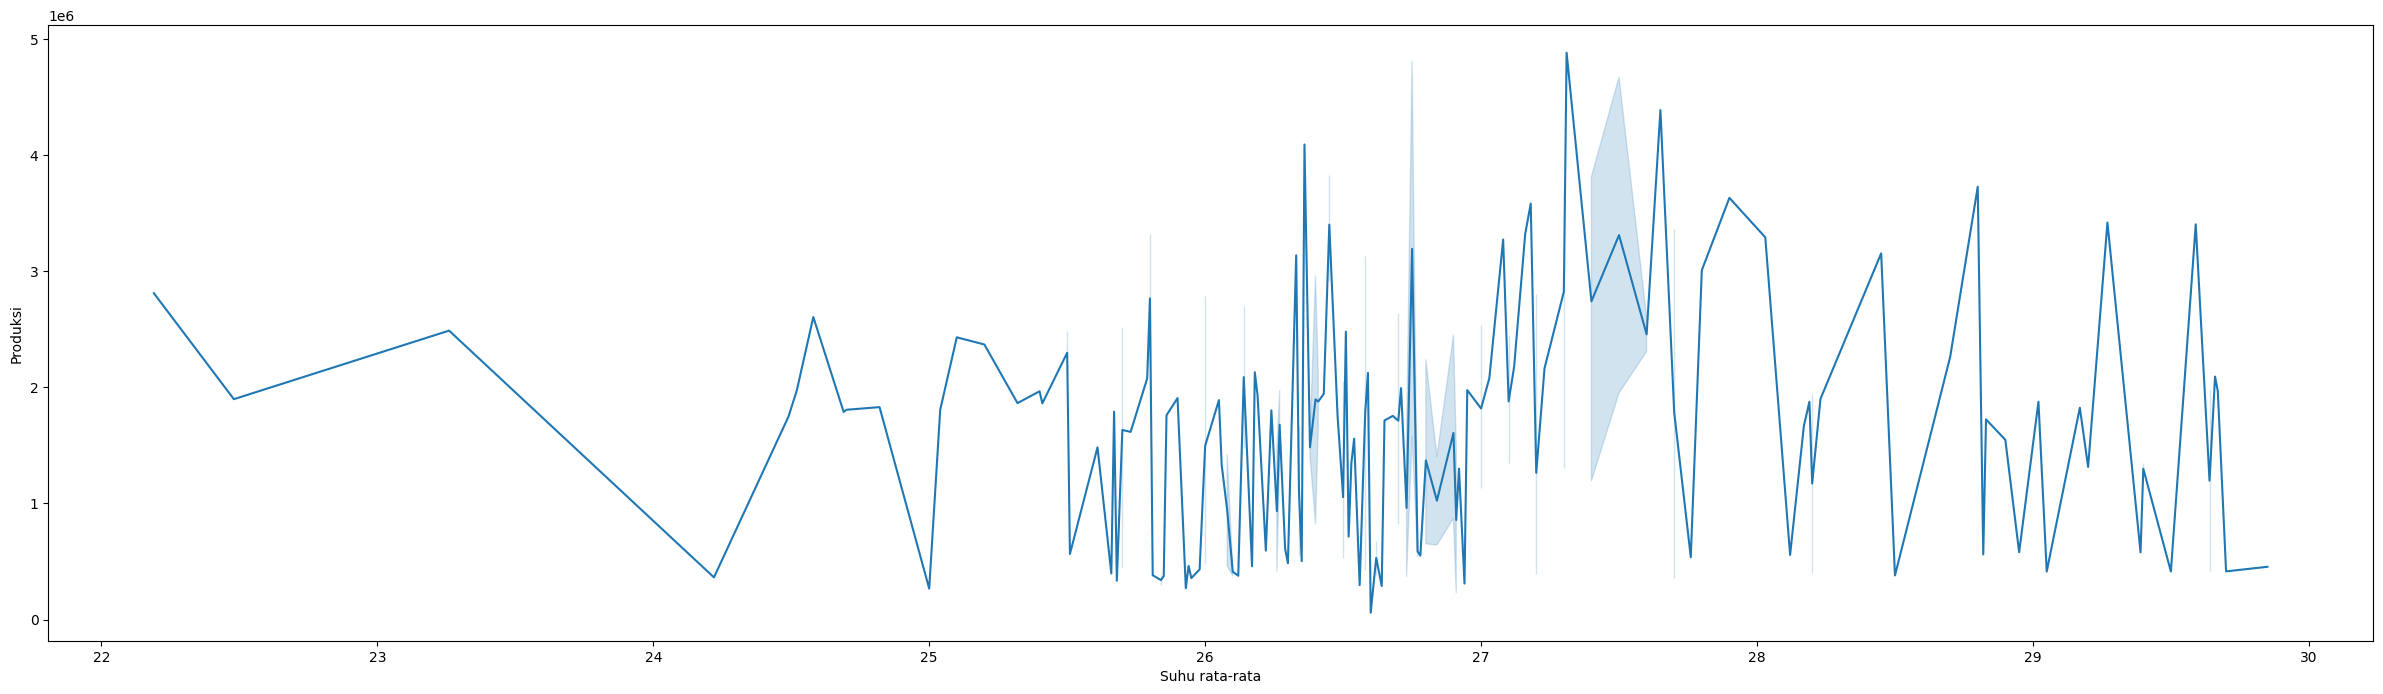

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(x='Suhu rata-rata',y='Produksi', data=data)
plt.show()

Produksi maksimum terjadi ketika suhu rata-rata berada dalam rentang 27-28 derajat Celsius.

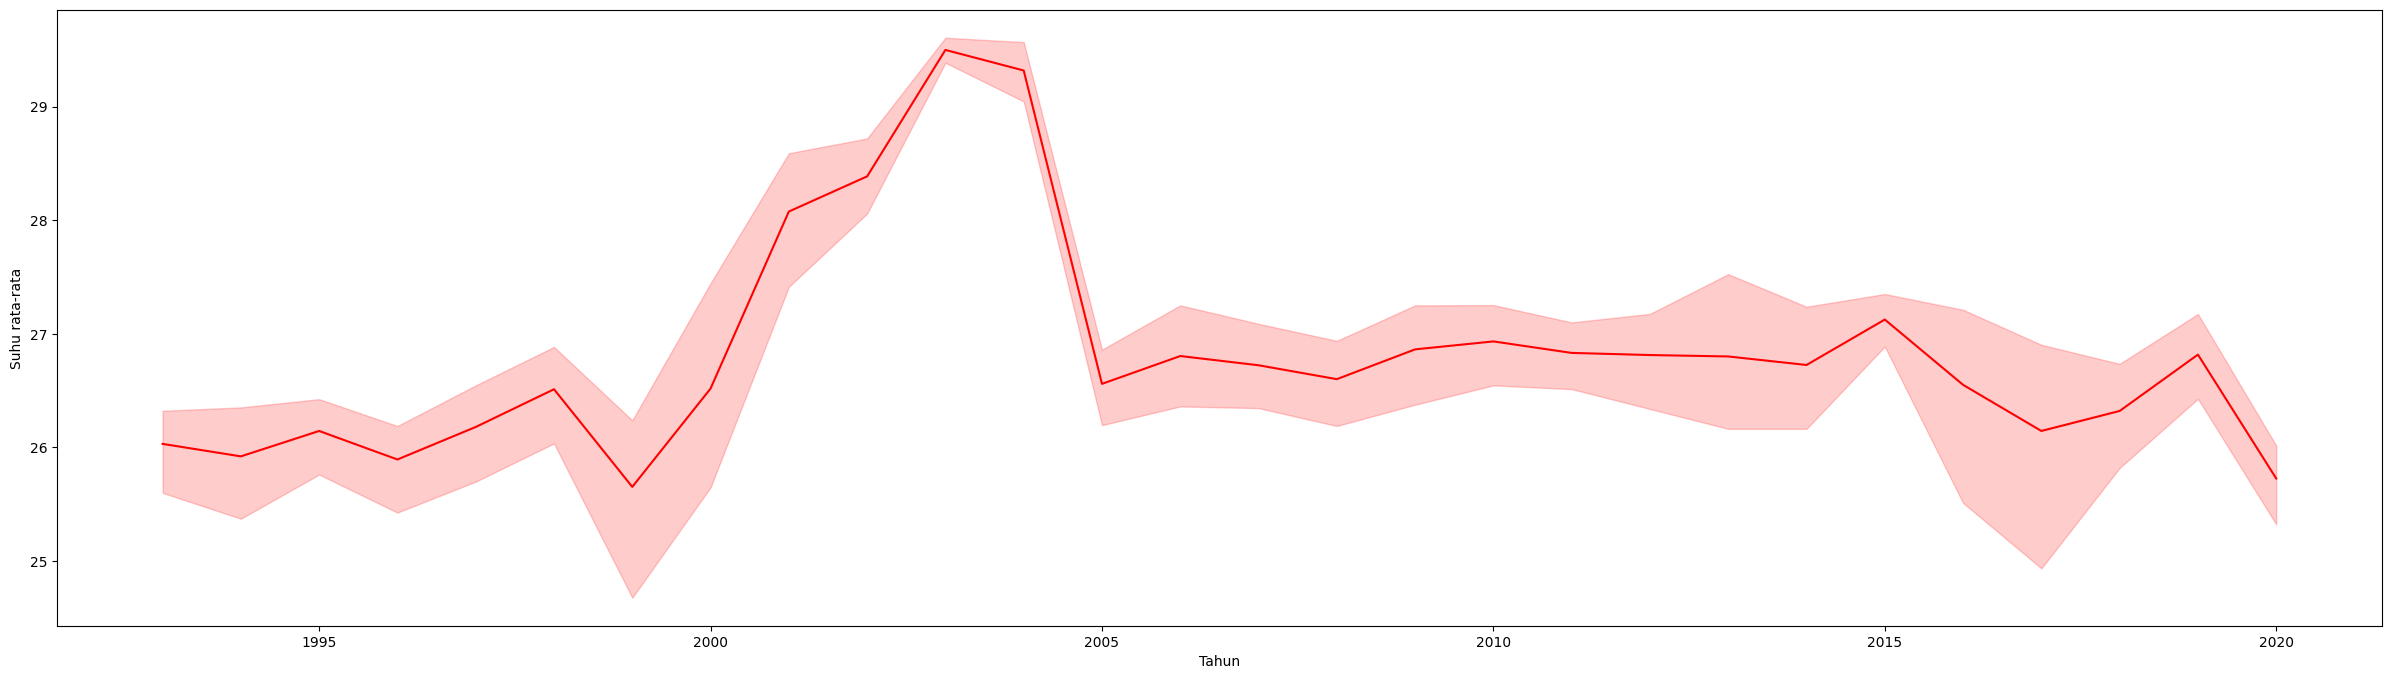

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(x='Tahun', y='Suhu rata-rata', data=data, color='red')
plt.show()


Suhu rata-rata tertinggi yang pernah dicapai terjadi pada tahun 2000-2005, yaitu lebih dari 29 derajat Celsius, tetapi pada tahun-tahun berikutnya cenderung stabil dalam rentang suhu 27 derajat Celsius.

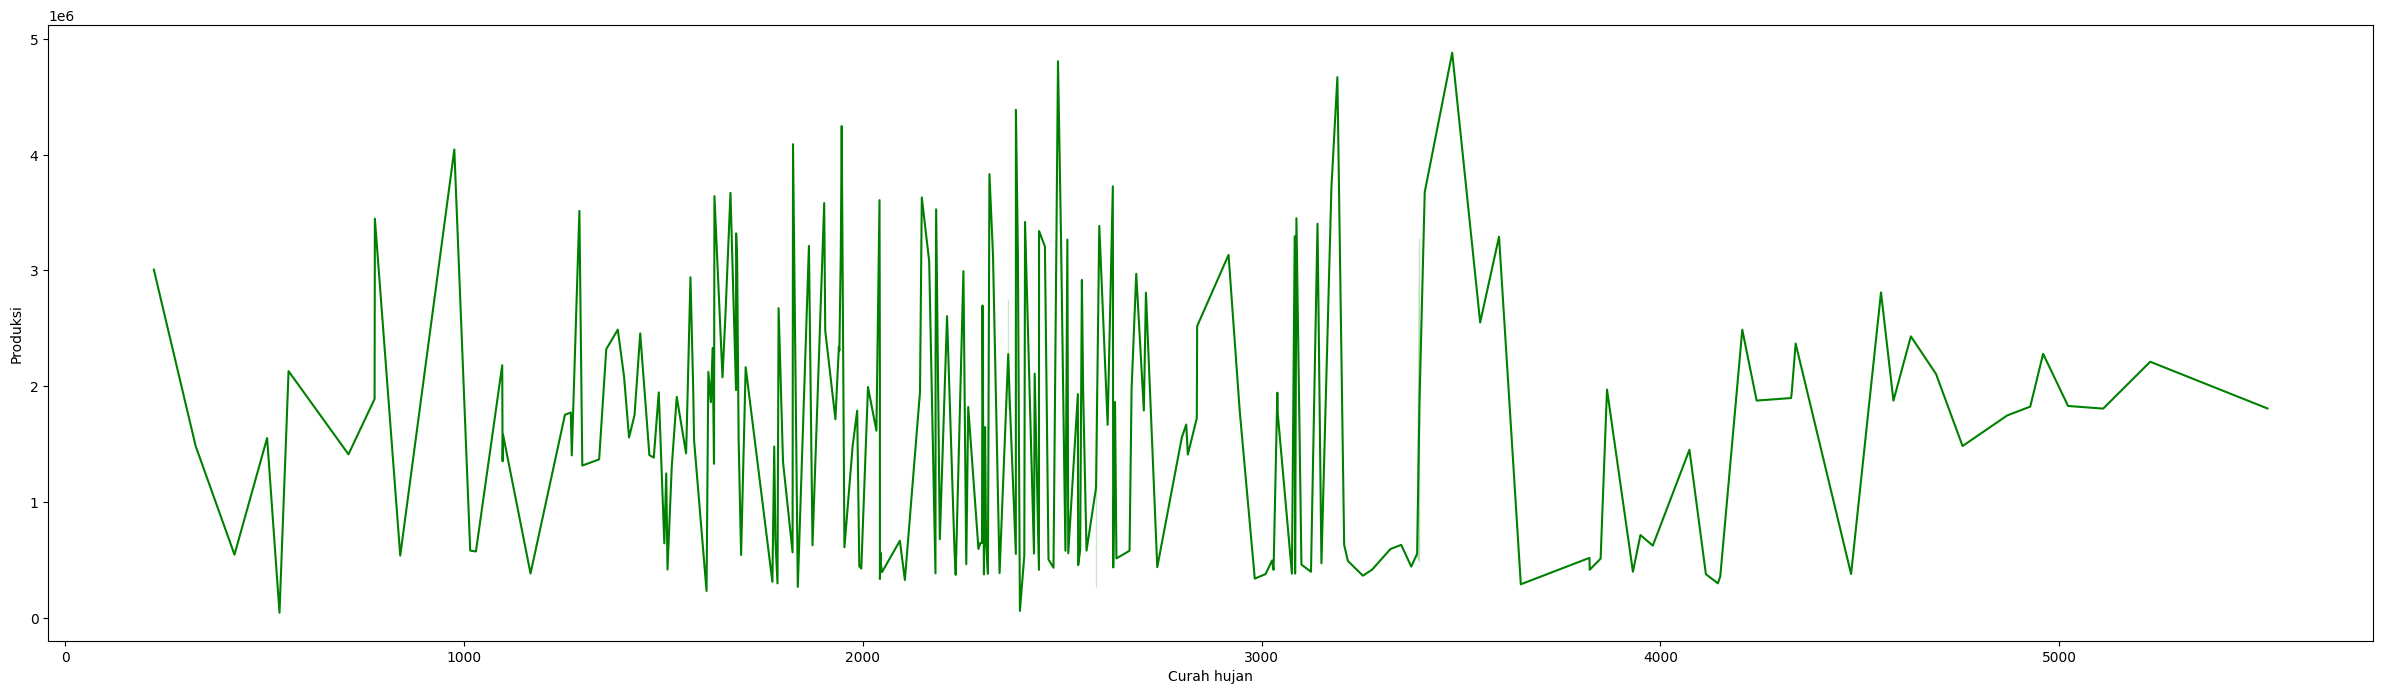

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(x='Curah hujan',y="Produksi", data=data, color='green')
plt.show()

Dapat dikatakan bahwa produksi mungkin lebih stabil pada curah hujan yang sedang, yaitu sekitar 2500mm per tahun.

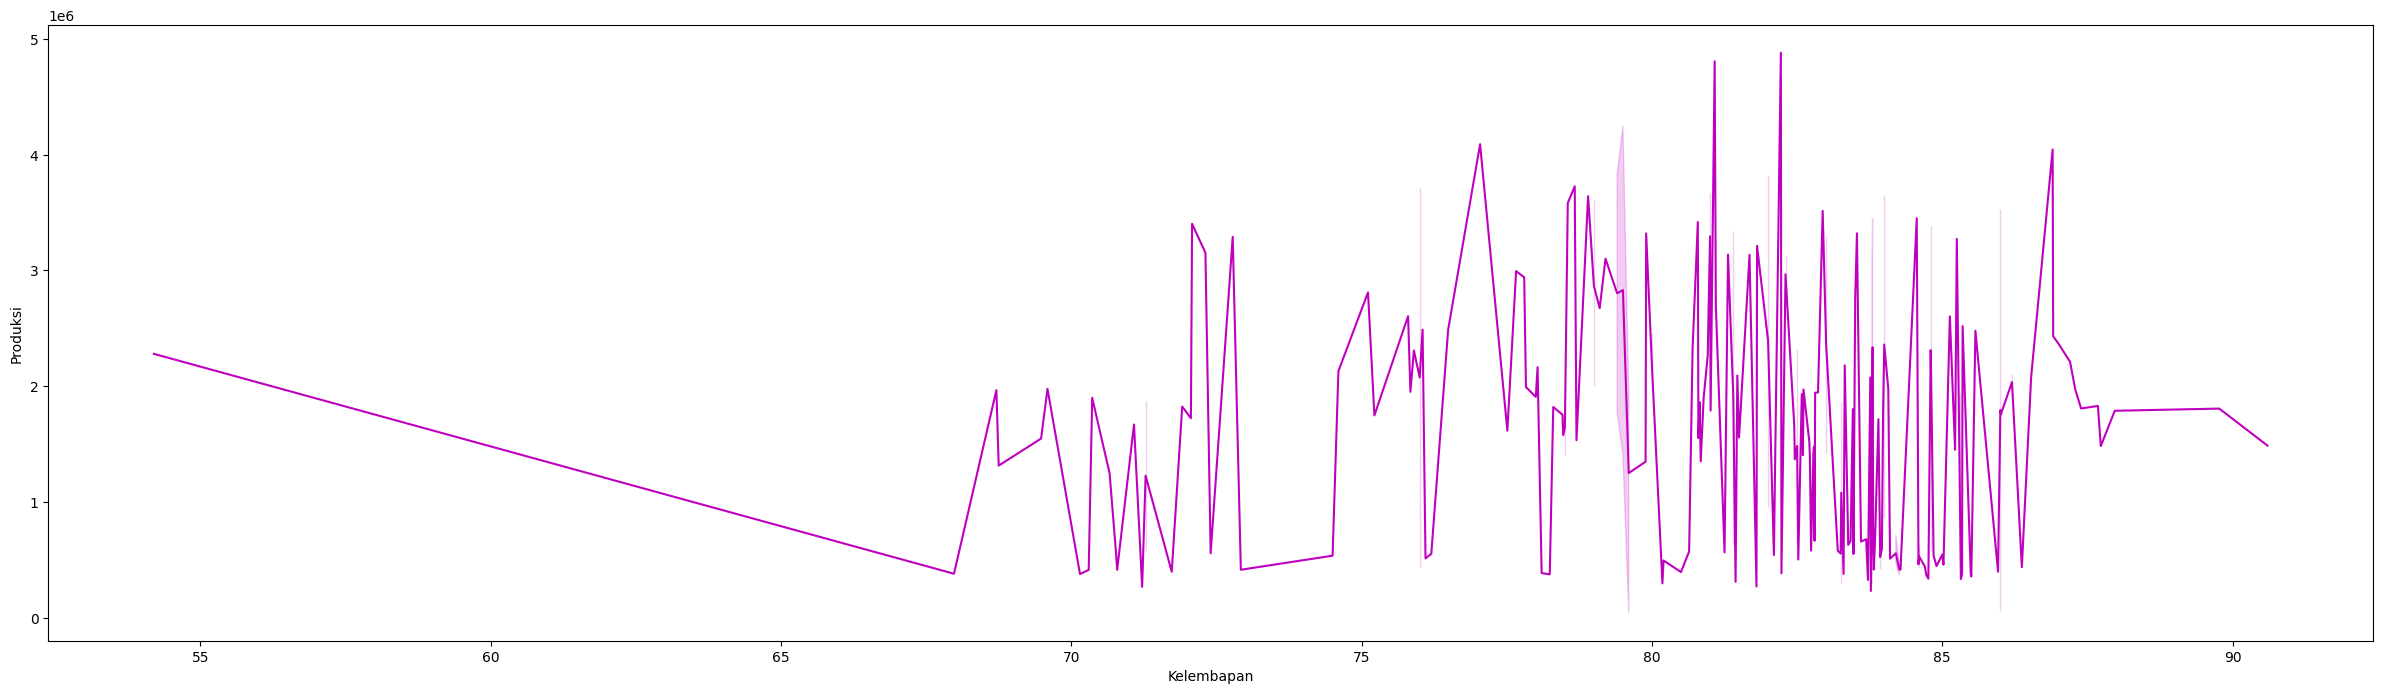

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(x='Kelembapan', y='Produksi', data=data, color='m')
plt.show()

Pada tingkat kelembaban sekitar 80-85%, produksi terlihat lebih optimal dan stabil.

Berdasarkan tujuan dari catatan ini, atribut yang akan menjadi output adalah panen (kolom = Produksi).

a. Distribusi jumlah produksi

In [ ]:
#statistikal plot
import scipy.stats as stats
import pylab as py

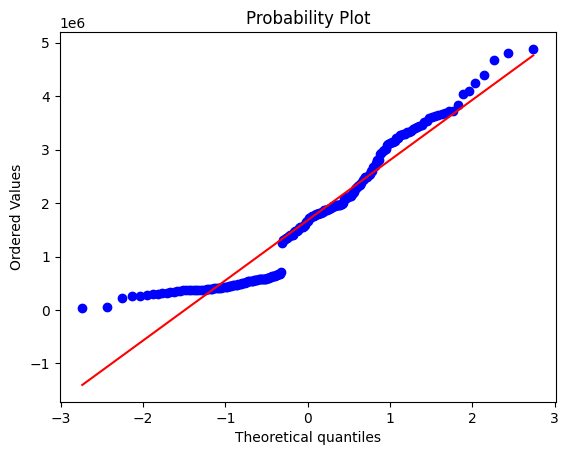

In [ ]:
#QQ-plot (Quantile-Quantile Plot)
stats.probplot(data['Produksi'], dist='norm', plot=py)
py.show()

Grafik QQ di atas menunjukkan bagaimana data terdistribusi dari variabel yang dipilih, yaitu variabel Produksi. Grafik di atas adalah grafik nilai kuantil teoretis dengan nilai kuantil dari variabel yang dipilih. Dengan demikian, grafik ini akan menjelaskan berapa banyak nilai dalam distribusi yang berada di atas atau di bawah batas tertentu. Dari hasil grafik di atas, diperoleh bahwa garis-garis cenderung lurus, yang berarti bahwa distribusi data dari variabel-variabel ini cenderung normal.

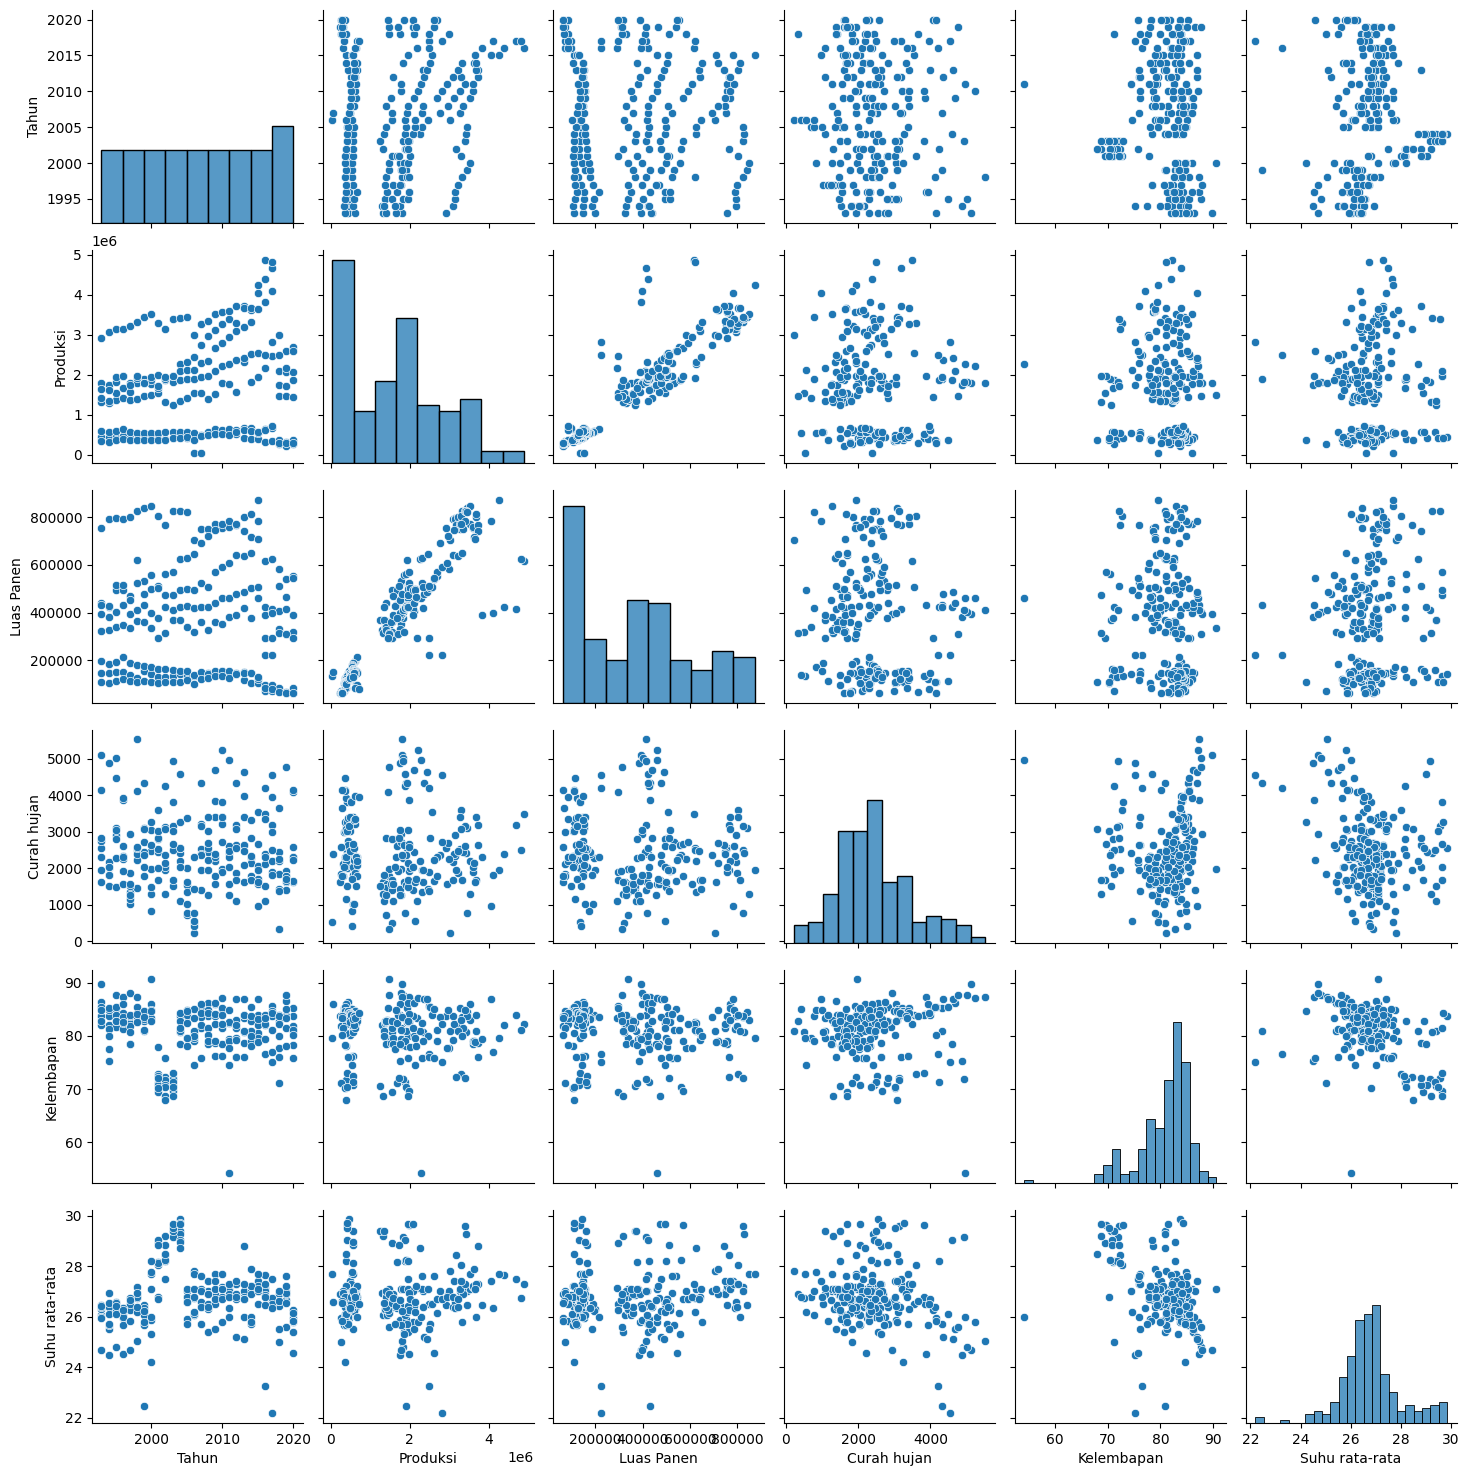

In [ ]:
sns.pairplot(data)


b. Pemeriksaan Outlier

<Axes: >

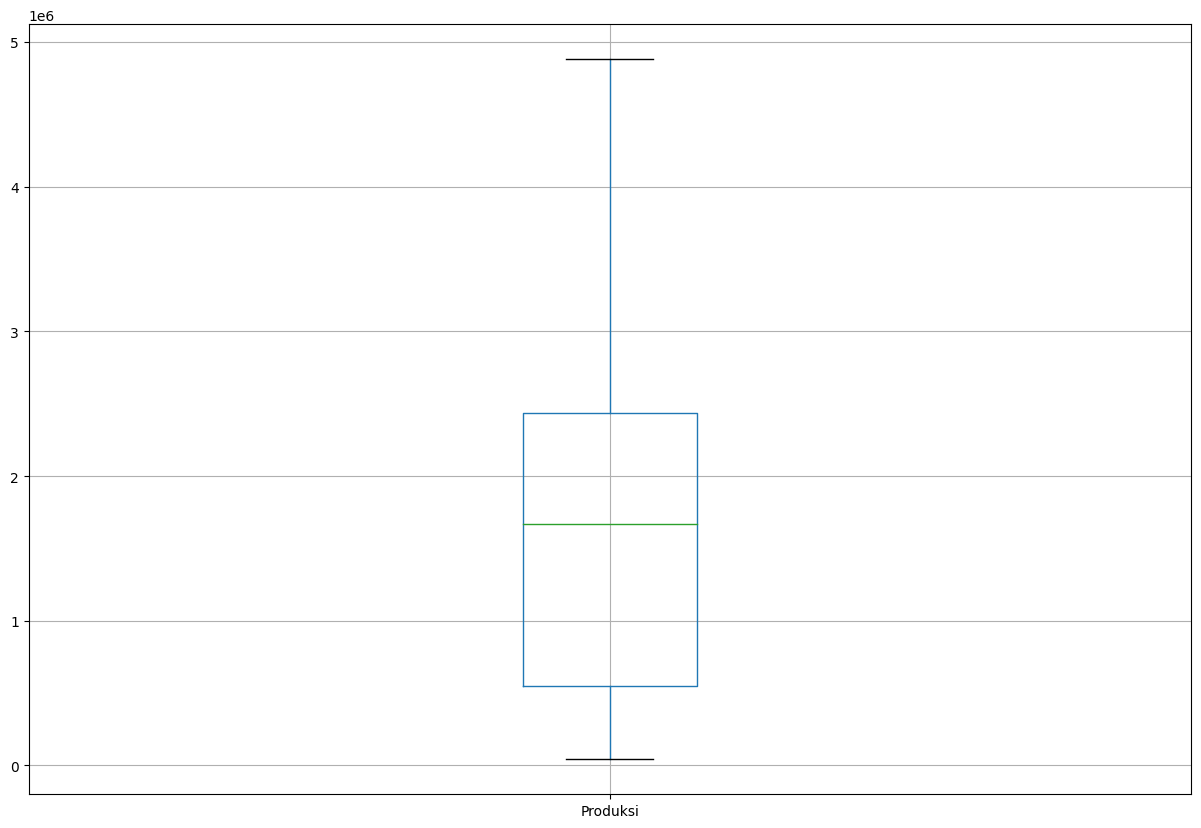

In [ ]:
data[['Produksi']].boxplot(figsize=(15,10))

Dari hasil visualisasi boxplot vertikal di atas, dapat dilihat bahwa tidak ada outlier dari variabel output, Produksi.

c. Matriks Korelasi antara variabel numerik

In [ ]:
data.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

In [ ]:
#Mengubah ke kolom order
cols = list(data.columns)

df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


Catatan:

- Korelasi >= 0,5 menunjukkan adanya hubungan yang konsisten antara variabel-variabel tersebut.
- Korelasi < 0,5 menunjukkan bahwa tidak ada hubungan yang erat antara variabel-variabel tersebut.

In [ ]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
Tahun,1.000000,-0.045951,-0.047645,-0.033474,0.004923,0.182527
Luas Panen,-0.045951,1.000000,-0.092975,-0.061121,0.115726,0.905622
Curah hujan,-0.047645,-0.092975,1.000000,0.056466,-0.228699,-0.042129
Kelembapan,-0.033474,-0.061121,0.056466,1.000000,-0.407799,-0.052316
Suhu rata-rata,0.004923,0.115726,-0.228699,-0.407799,1.000000,0.041160
Produksi,0.182527,0.905622,-0.042129,-0.052316,0.041160,1.000000


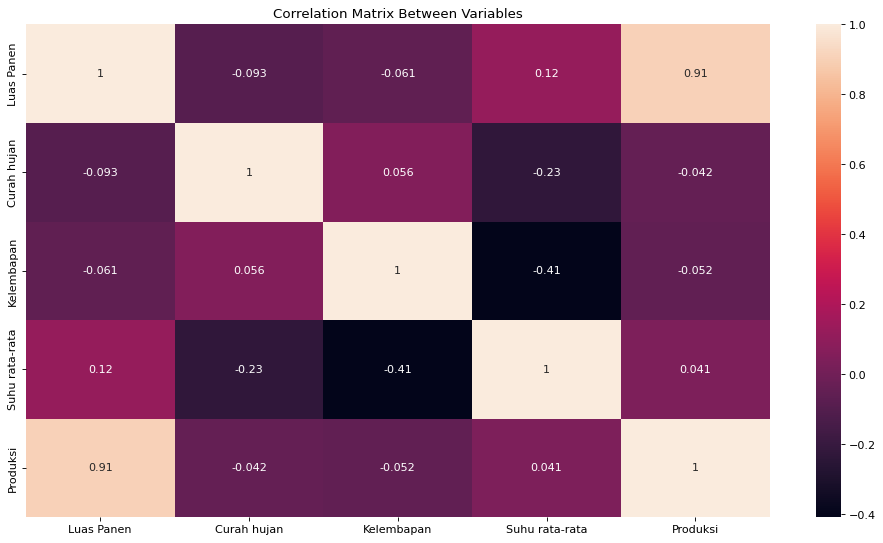

In [ ]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Produksi'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Variables')
plt.show()

Dari matriks korelasi, dapat dilihat tipe korelasi antara variabel independen dan variabel output.

Luas lahan pertanian dan suhu rata-rata memiliki nilai korelasi positif, yang berarti bahwa ketika nilai variabel independen tersebut semakin besar, produksi juga akan meningkat, meskipun mungkin tidak signifikan (pengaruh dari suhu).

Sementara itu, variabel curah hujan dan kelembaban memiliki nilai korelasi negatif, yang berarti bahwa ketika kedua variabel tersebut semakin kecil, produksi akan meningkat (pergerakan grafik bergerak secara terbalik), meskipun hubungannya tidak terlalu kuat.

3. Data Pre-processing(Feature Engineering)

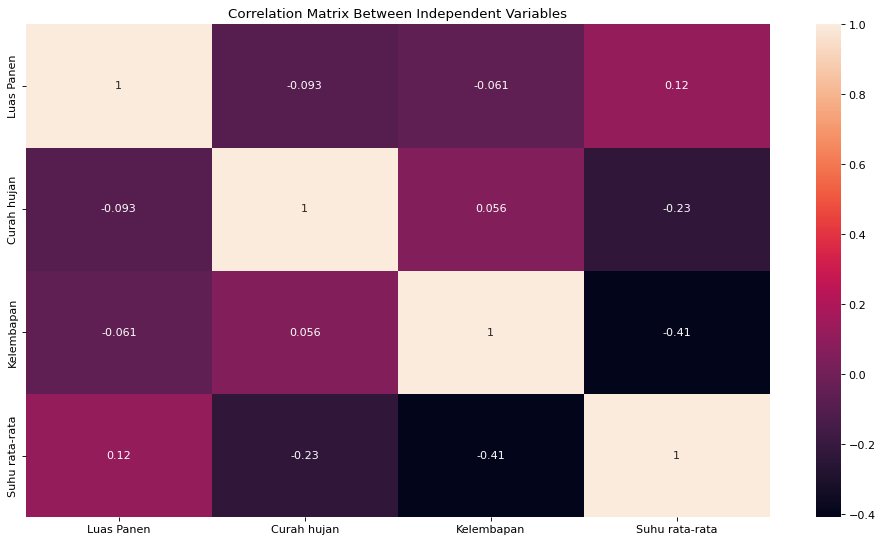

In [ ]:
#checking multicollinearity
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Suhu rata-rata'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Independent Variables')
plt.show()

Multikolinearitas adalah situasi yang menunjukkan adanya korelasi atau hubungan yang kuat antara dua atau lebih variabel independen dalam model regresi yang akan mempengaruhi stabilitas dan akurasi model. Salah satu cara untuk mendeteksi keberadaan multikolinearitas dalam model regresi adalah dengan melihat kekuatan korelasi antara variabel independen. Jika terdapat korelasi antara variabel independen > 0,8, hal ini dapat mengindikasikan adanya multikolinearitas.

Oleh karena itu, dari matriks di atas dapat disimpulkan bahwa tidak ditemukan multikolinearitas.

**Feature Encoding**

Data kategori adalah variabel yang berisi nilai label daripada nilai numerik. Jumlah nilai yang mungkin sering dibatasi menjadi satu set tetap, seperti dalam dataset ini, nilai 'Provinsi'. Banyak algoritma pembelajaran mesin tidak dapat mengoperasikan data label secara langsung. Mereka memerlukan semua variabel input dan output dalam bentuk numerik. Artinya, data kategori harus dikonversi ke dalam bentuk numerik.

Pengodean satu-hot (one-hot encoding) adalah proses di mana variabel kategori dikonversi menjadi bentuk yang dapat diberikan kepada algoritma pembelajaran mesin untuk melakukan prediksi yang lebih baik. Untuk tujuan itu, pengodean satu-hot akan digunakan untuk mengonversi kolom 'Provinsi' menjadi larik numerik satu-hot.

Nilai kategorikal mewakili nilai numerik dari entri dalam dataset. Pengodean ini akan membuat kolom biner untuk setiap kategori dan menghasilkan matriks dengan hasilnya.

In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Provinsi']
ohe = OneHotEncoder()
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df = pd.concat([df, data_ohe_res], axis=1)
df = df.drop(columns=string_feat)
df.head()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,1993,323589.0,1627.0,82.00,26.06,1329536.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,329041.0,1521.0,82.12,26.92,1299699.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,339253.0,1476.0,82.72,26.27,1382905.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996,348223.0,1557.0,83.00,26.08,1419128.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,337561.0,1339.0,82.46,26.31,1368074.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Feature Selection**

In [ ]:
df = df.drop(columns='Tahun')
df.tail()

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
219,390799.00,2317.6,79.40,26.45,3831923.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,396559.00,1825.1,77.04,26.36,4090654.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,511940.93,1385.8,76.05,25.50,2488641.91,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,464103.42,1706.4,78.03,27.23,2164089.33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223,545149.05,2211.3,75.80,24.58,2604913.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
x = df.drop('Produksi',axis=1)
y = df[['Produksi']]

**Train and Test Split**

Dataset akan dibagi menjadi dua dataset, yaitu dataset pelatihan dan dataset pengujian. Pembagian data biasanya tidak merata karena pelatihan model biasanya memerlukan sebanyak mungkin data. Pembagian umum adalah 70/30 atau 80/20 untuk pelatihan/pengujian.

Dataset pelatihan adalah dataset awal yang digunakan untuk melatih algoritma Pembelajaran Mesin (ML) agar dapat belajar dan menghasilkan prediksi yang tepat. (70% dari dataset adalah dataset pelatihan).

Namun, dataset pengujian digunakan untuk mengevaluasi seberapa baik algoritma ML telah dilatih dengan dataset pelatihan. Kita tidak bisa sekadar menggunakan kembali dataset pelatihan pada tahap pengujian karena algoritma ML sudah "mengetahui" output yang diharapkan, yang bertentangan dengan tujuan pengujian algoritma. (30% dari dataset adalah dataset pengujian).

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 12)
x_test : (68, 12)
y_train : (156, 1)
y_test : (68, 1)


In [ ]:
x_train[:5]

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
166,539316.52,1655.5,85.13,27.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,822073.00,776.7,83.80,27.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,320789.00,506.5,80.80,26.73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,159463.00,2508.1,71.28,29.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89,126280.00,2233.0,84.26,26.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_test.tail()

,Produksi
186,502552.0
61,1807622.0
52,4669777.5
66,1823739.0
26,1714437.6


**Feature Scaling**


Dataset ini mengandung fitur yang sangat bervariasi dalam magnitudo, satuan, dan rentang. Fitur-fitur dengan magnitudo tinggi akan memiliki pengaruh yang lebih besar dalam perhitungan jarak dibandingkan dengan fitur-fitur dengan magnitudo rendah.

Untuk menekan efek ini, kita perlu menyamakan semua fitur pada tingkat magnitudo yang sama. Hal ini dapat dicapai dengan melakukan penskalaan (scaling).

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [ ]:
x_train[:5]

array([[ 7.16699915e-01, -8.39566916e-01,  9.37541781e-01,
         6.92312495e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01,  2.76887462e+00, -4.05190208e-01],
       [ 1.92735709e+00, -1.70505807e+00,  6.36262189e-01,
         2.09231762e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01,  2.46797672e+00],
       [-2.18952945e-01, -1.97116607e+00, -4.33158388e-02,
        -8.15456793e-03,  2.76887462e+00, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01, -4.05190208e-01],
       [-9.09690355e-01,  1.21023610e-04, -2.19984345e+00,
         2.13350335e+00, -3.61157559e-01, -4.05190208e-01,
         2.60768096e+00, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01, -4.05190208e-01],
       [-1.05176751e+00, -2.70812770e-01,  7.4046415

In [ ]:
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.71669991 -0.83956692  0.93754178  0.69231249 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587  2.76887462 -0.40519021]
 [ 1.92735709 -1.70505807  0.63626219  0.20923176 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756  2.46797672]
 [-0.21895294 -1.97116607 -0.04331584 -0.00815457  2.76887462 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-0.90969035  0.00012102 -2.19984345  2.13350335 -0.36115756 -0.40519021
   2.60768096 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-1.05176751 -0.27081277  0.74046415 -0.00815457 -0.36115756 -0.40519021
  -0.38348249 -0.36115756  2.68524232 -0.37240587 -0.36115756 -0.40519021]]
[[ 0.77273334]
 [ 1.48736091]
 [-0.11743608]
 [-0.94191188]
 [-1.11821706]]


In [ ]:
print(x_train.min())
print(x_train.max())

-3.6634654470384587
2.7688746209726918


In [ ]:
print(y_train.min())
print(y_train.max())

-1.3819365029127002
2.7012953756267932


In [ ]:
print(x_test[:5])
print(y_test[:5])

[[-1.07170771 -0.31302577  0.53326331 -0.34207301 -0.4152274  -0.31108551
  -0.36514837 -0.4152274   2.56038192 -0.39056673 -0.4152274  -0.31108551]
 [ 0.51064077 -0.79631917  0.34793546  1.18107828 -0.4152274  -0.31108551
  -0.36514837  2.40831892 -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.2012385  -0.26857953  0.77401631 -1.18826817 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.23204632 -0.12562823  0.49169445 -0.30446434 -0.4152274  -0.31108551
   2.73861279 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.11782994  0.78499627  0.58002828 -0.51131204 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]]
[[-1.11263695]
 [ 0.26419173]
 [-1.19391204]
 [-0.88288197]
 [-1.07069477]]


**4. Modeling**

Pemodelan dilakukan menggunakan 6 algoritma, yaitu:

1. Regresi Linear
2. Random Forest Regressor
3. Gradient Boosting
4. Support Vector Regressor
5. Decision Tree Regressor
6. K-Nearest Neighbors Regressor

Untuk setiap model, akan diterapkan penyetelan hiperparameter (hyperparameter tuning) untuk meningkatkan performa model berdasarkan skor R2. Untuk mencari parameter terbaik, akan digunakan Grid Search CV atau Randomized Search CV, tergantung pada bagaimana algoritma tersebut bekerja.

Validasi silang (Cross-validation atau CV) adalah prosedur resampling yang digunakan untuk mengevaluasi model pembelajaran mesin pada sampel data yang terbatas. Prosedur ini memiliki parameter tunggal yang disebut k yang menentukan pembagian sampel data menjadi beberapa bagian. Oleh karena itu, prosedur ini sering disebut sebagai k-fold cross-validation.

Untuk memeriksa seberapa baik model memprediksi, akan disajikan visualisasi dalam bentuk gambar grafik distplot dari hasil perkiraan oleh algoritma dengan data asli.

Selanjutnya, akan dilakukan evaluasi untuk menentukan algoritma terbaik dari keenam algoritma yang dipilih.

Catatan:
Setelah selesai melakukan penyetelan hiperparameter menggunakan Randomized Search CV, kode tersebut digunakan sebagai komentar karena ketika kode dijalankan kembali, hasil penyetelan akan berbeda, meskipun skor model tidak terlalu berbeda.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

**Linear Regression**


Regresi Linear adalah algoritma untuk pemodelan regresi yang digunakan untuk memprediksi nilai variabel berdasarkan nilai variabel lainnya.

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Lakukan kebalikan untuk kembali ke nilai asli (karena sebelumnya telah distandardisasi).
ypred_LinReg = sc.inverse_transform(LinReg.predict(x_test).reshape(-1,1))
y_pred_LinReg = pd.DataFrame(ypred_LinReg)
y_pred_LinReg.tail()

,0
63,3.111825e+05
64,2.076688e+06
65,2.727175e+06
66,1.934337e+06
67,1.553306e+06


<ipython-input-41-cfade503f485>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
<ipython-input-41-cfade503f485>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_LinReg, hist=False, label='Predicted')


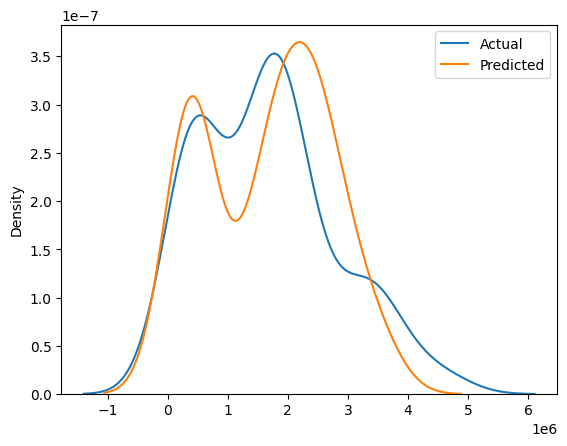

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
sns.distplot(y_pred_LinReg, hist=False, label='Predicted')
plt.legend()

In [ ]:
# Periksa akurasi pengujian dan pelatihan model Regresi Linear.
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

# Evaluasi kinerja metode Regresi Linear dengan membagi data sampel menjadi 10 lipatan secara acak.
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('Rata-rata Cross Validation Score adalah',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  84.68578496928782
Test  :  86.37276105524144 

Rata-rata Cross Validation Score adalah 82.9


**Hyperparameter Tuning**

In [ ]:
LinReg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
param_grid = dict(
    copy_X=[True, False],
    fit_intercept=[True, False],
    n_jobs=np.arange(1,11),
    positive=[True, False],
)

LinReg_tuning = LinearRegression()

LinReg_search = GridSearchCV(estimator=LinReg_tuning,
                           param_grid=param_grid,
                           scoring='r2')

LinReg_best_model = LinReg_search.fit(x_train, y_train)
print('Parameter Optimal', LinReg_best_model.best_params_)
print('Skor Terbaik adalah {}'.format(LinReg_best_model.best_score_))

Parameter Optimal {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}
Skor Terbaik adalah 0.8387472527255266


**Fit New Model**

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression(copy_X= True, fit_intercept= False, n_jobs= 1, positive= True)
LinReg_model.fit(x_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=1, positive=True)

In [ ]:
ypred_LinReg_model = sc.inverse_transform(LinReg_model.predict(x_test).reshape(-1,1))
ypred_LinReg_model = pd.DataFrame(ypred_LinReg_model)
ypred_LinReg_model.tail()

,0
63,4.556448e+05
64,2.049707e+06
65,2.917382e+06
66,1.980058e+06
67,1.487799e+06


<ipython-input-47-1d9805a772a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-47-1d9805a772a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')


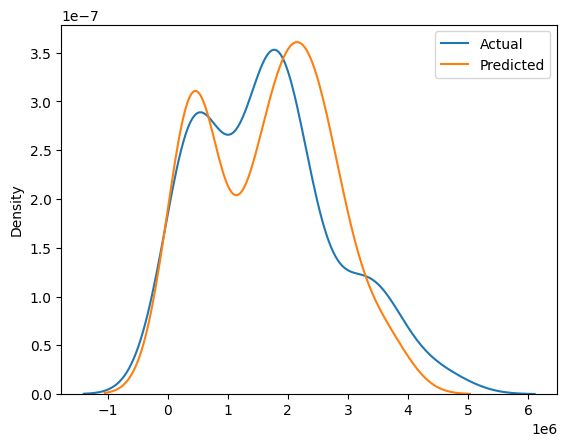

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model Regresi Linear.
print('Linear Regression')
LinReg_model_train = LinReg_model.score(x_train,y_train)*100
LinReg_model_test = LinReg_model.score(x_test, y_test)*100

#Evaluasi kinerja metode Regresi Linear dengan membagi data sampel menjadi 10 lipatan secara acak.
LinReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',LinReg_model_train)
print('Test  : ',LinReg_model_test, '\n')
print('Rata-rata Cross Validation Score Adalah',np.round(np.mean(LinReg_model_score)*100,2))

Linear Regression
Train :  84.6508189494205
Test  :  86.89566591106708 

Rata-rata Cross Validation Score Adalah 83.0


Model baru Regresi Linear telah mengalami peningkatan sedikit setelah penyetelan hiperparameter.

**Random Forest Regression**





Random Forest Regressor adalah algoritma untuk pemodelan regresi yang digunakan untuk memprediksi nilai yang dapat dipertahankan.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
RFReg.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=0)

In [ ]:
ypred_RFReg = sc.inverse_transform(RFReg.predict(x_test).reshape(-1,1))
y_pred_RFReg = pd.DataFrame(ypred_RFReg)
y_pred_RFReg.tail()

,0
63,4.490402e+05
64,1.875380e+06
65,2.600398e+06
66,1.951832e+06
67,2.114010e+06


<ipython-input-51-15081544ea2d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-51-15081544ea2d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_RFReg,hist=False,label='Predicted')


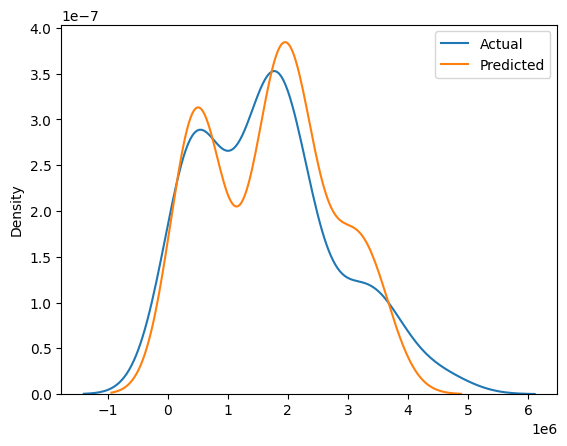

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_RFReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model Random Forest Regression
print('Random Forest Regression')
RFReg_train = RFReg.score(x_train,y_train.ravel())*100
RFReg_test = RFReg.score(x_test, y_test)*100

#Evaluasi kinerja metode Random Forest Regressor dengan membagi data sampel menjadi 10 lipatan secara acak.
RFReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_score = cross_val_score(RFReg,x,y,cv=RFReg_cv)

print('Train : ',RFReg_train)
print('Test  : ',RFReg_test, '\n')
print('Rata-rata Cross Validation Score Adalah',np.round(np.mean(RFReg_score)*100,2))

Random Forest Regression


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Train :  95.23971349396201
Test  :  85.48007246824575 

Rata-rata Cross Validation Score Adalah 83.81


**Hyperparameter Tuning**

In [ ]:
RFReg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'bootstrap' : [True, False],
              'max_depth': np.arange(1,11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'n_estimators': np.arange(100, 501)}

RFReg_tuning = RandomForestRegressor()

RFReg_search = RandomizedSearchCV(RFReg_tuning, param_grid, cv = 10, scoring='r2')

RFReg_best_model = RFReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', RFReg_best_model.best_params_)
print('Best score is {}'.format(RFReg_best_model.best_score_))

Optimum parameters {'n_estimators': 382, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_depth': 10, 'bootstrap': True}
Best score is 0.838386518484195


**Fit New Model**

In [ ]:
RFReg_model = RandomForestRegressor(n_estimators=227, max_depth=9, min_samples_split=2, min_samples_leaf=1, random_state=0)
RFReg_model.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=9, n_estimators=227, random_state=0)

In [ ]:
ypred_RFReg_model = sc.inverse_transform(RFReg_model.predict(x_test).reshape(-1,1))
ypred_RFReg_model = pd.DataFrame(ypred_RFReg_model)
ypred_RFReg_model.tail()

,0
63,4.374426e+05
64,1.874739e+06
65,2.709860e+06
66,1.895373e+06
67,2.136797e+06


<ipython-input-57-b4da50e613f2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-57-b4da50e613f2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')


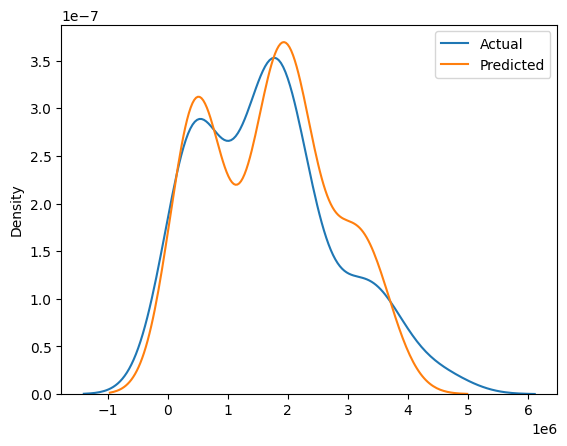

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model Random Forest Regression.
print('Random Forest Regression')
RFReg_model_train = RFReg_model.score(x_train,y_train)*100
RFReg_model_test = RFReg_model.score(x_test, y_test)*100


#Evaluasi kinerja metode Random Forest Regressor dengan membagi data sampel menjadi 10 lipatan secara acak.
RFReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',RFReg_model_train)
print('Test  : ',RFReg_model_test, '\n')
print('Rata-rata Cross Validation Score Adalah',np.round(np.mean(RFReg_model_score)*100,2))

Random Forest Regression
Train :  97.47517414251053
Test  :  86.37724010302279 

Rata-rata Cross Validation Score Adalah 83.0


Model Regresi Random Forest tampil lebih baik setelah diterapkan beberapa parameter yang disesuaikan.

**Gradient Boosting**


Gradient Boosting Regressor memberikan model prediksi dalam bentuk gabungan dari model prediksi yang lemah, yang umumnya berupa pohon keputusan.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBReg = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=0)
GBReg.fit(x_train, y_train.ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=0)

In [ ]:
ypred_GBReg = sc.inverse_transform(GBReg.predict(x_test).reshape(-1,1))
y_pred_GBReg = pd.DataFrame(ypred_GBReg)
y_pred_GBReg.tail()

,0
63,4.216658e+05
64,1.919787e+06
65,3.221704e+06
66,1.802274e+06
67,2.337136e+06


<ipython-input-61-f82100009c8b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-61-f82100009c8b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_GBReg,hist=False,label='Predicted')


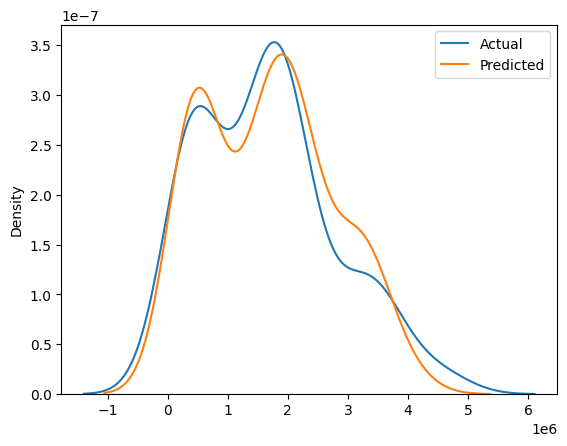

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_GBReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model Gradient Boosting Regression
print('Gradient Boosting Regression')
GBReg_train = GBReg.score(x_train,y_train.ravel())*100
GBReg_test = GBReg.score(x_test, y_test)*100

#Evaluasi kinerja metode Random Forest Regressor dengan membagi data sampel menjadi 10 lipatan secara acak.
GBReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_score = cross_val_score(GBReg,x,y,cv=GBReg_cv)

print('Train : ',GBReg_train)
print('Test  : ',GBReg_test, '\n')
print('Rata-rata Cross Validation Score Adalah',np.round(np.mean(GBReg_score)*100,2))

Gradient Boosting Regression


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Train :  99.99976363346896
Test  :  85.98294460533783 

Rata-rata Cross Validation Score Adalah 83.25


**Hyperparameter Tuning**

In [ ]:
GBReg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'subsample' : np.arange(0.1, 1.1),
              'max_depth': np.arange(1,11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'n_estimators': [500, 1000, 2000],
              'learning_rate': [0.001, 0.01, 0.1] }

GBReg_tuning = GradientBoostingRegressor()

GBReg_search = RandomizedSearchCV(GBReg_tuning, param_grid, cv = 10, scoring='r2')

GBReg_best_model = GBReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', GBReg_best_model.best_params_)
print('Best score is {}'.format(GBReg_best_model.best_score_))

Fit New Model

In [ ]:
GBReg_model = GradientBoostingRegressor(subsample= 0.1, n_estimators= 2000, min_samples_split= 9, min_samples_leaf= 1, max_depth= 10, learning_rate= 0.01, random_state= 0)
GBReg_model.fit(x_train, y_train.ravel())

In [ ]:
ypred_GBReg_model = sc.inverse_transform(GBReg_model.predict(x_test).reshape(-1,1))
ypred_GBReg_model = pd.DataFrame(ypred_GBReg_model)
ypred_GBReg_model.tail()

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_GBReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model Gradient Boosting Regression
print('Gradient Boosting Regression')
GBReg_model_train = GBReg_model.score(x_train,y_train.ravel())*100
GBReg_model_test = GBReg_model.score(x_test, y_test.ravel())*100

#Evaluasi kinerja metode Random Forest Regressor dengan membagi data sampel menjadi 10 lipatan secara acak.
GBReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_model_score = cross_val_score(GBReg_model,x,y,cv=GBReg_model_cv)

print('Train : ',GBReg_model_train)
print('Test  : ',GBReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_model_score)*100,2))

Gradient Boosting Regression


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Train :  91.67962894437088
Test  :  86.20834231739471 

The Average Cross Validation Score is 83.96



Model regresi baru dengan algoritma gradient boosting mengalami penurunan akurasi pada data pelatihan tetapi meningkat pada data pengujian.

**Support Vector Regression**


SVR (Support Vector Regressor) memberikan fleksibilitas untuk menentukan seberapa besar kesalahan yang dapat diterima dalam model dan akan menemukan garis yang sesuai (atau hiperplane dalam dimensi yang lebih tinggi) untuk mencocokkan data.

In [ ]:
from sklearn.svm import SVR
SVReg = SVR(gamma = 1)
SVReg.fit(x_train, y_train.ravel())

SVR(gamma=1)

In [ ]:
ypred_SVReg = sc.inverse_transform(SVReg.predict(x_test).reshape(-1,1))
y_pred_SVReg = pd.DataFrame(ypred_SVReg)
y_pred_SVReg.tail()

,0
63,1.086560e+06
64,1.757398e+06
65,1.915177e+06
66,1.690874e+06
67,1.815422e+06


<ipython-input-71-8db9531a08d4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-71-8db9531a08d4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_SVReg,hist=False,label='Predicted')


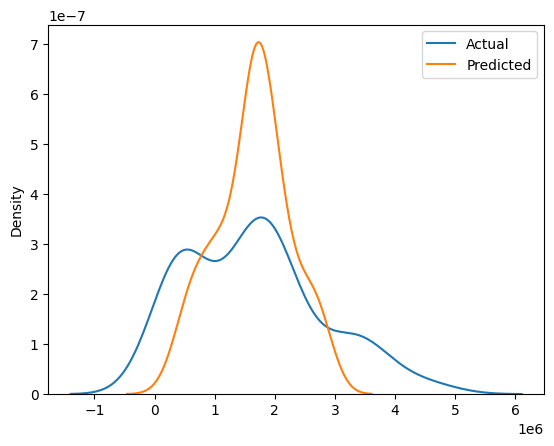

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_SVReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model Support Vector Regression
print('Support Vector Regression')
SVReg_train = SVReg.score(x_train,y_train.ravel())*100
SVReg_test = SVReg.score(x_test, y_test)*100

#Evaluasi kinerja metode Random Forest Regressor dengan membagi data sampel menjadi 10 lipatan secara acak.
SVReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_score = cross_val_score(SVReg,x,y,cv=SVReg_cv)

print('Train : ',SVReg_train)
print('Test  : ',SVReg_test, '\n')
print('Rata-rata Cross Validation Score Adalah',np.round(np.mean(SVReg_score)*100,2))

Support Vector Regression
Train :  92.62509041219276
Test  :  60.81422434326272 

Rata-rata Cross Validation Score Adalah -7.15


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

**Hyperparameter Tuning**

In [ ]:
SVReg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'C': [0.1, 1, 10, 100, 1000],
              'epsilon': [0.001, 0.01, 0.1]}

SVReg_tuning = SVR()

SVReg_search = GridSearchCV(SVReg_tuning, param_grid, cv = 10, scoring='r2')

SVReg_best_model = SVReg_search.fit(x_train, y_train.ravel())
print('Parameter Optimal', SVReg_best_model.best_params_)
print('Skor Terbaik adalah {}'.format(SVReg_best_model.best_score_))

Parameter Optimal {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}
Skor Terbaik adalah 0.8410602764707769


**Fit New Model**

In [ ]:
SVReg_model = SVR(C= 1, epsilon= 0.1, gamma= 0.1)
SVReg_model.fit(x_train, y_train.ravel())

SVR(C=1, gamma=0.1)

In [ ]:
ypred_SVReg_model = sc.inverse_transform(SVReg_model.predict(x_test).reshape(-1,1))
ypred_SVReg_model = pd.DataFrame(ypred_SVReg_model)
ypred_SVReg_model.tail()

,0
63,5.679776e+05
64,1.665946e+06
65,2.256916e+06
66,1.687524e+06
67,1.495696e+06


<ipython-input-77-bebef986bd94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-77-bebef986bd94>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_SVReg_model,hist=False,label='Predicted')


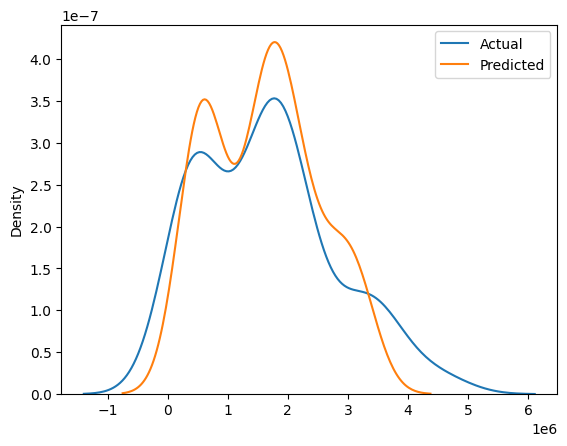

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_SVReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model Support Vector Regression
print('Support Vector Regression')
SVReg_model_train = SVReg_model.score(x_train,y_train.ravel())*100
SVReg_model_test = SVReg_model.score(x_test, y_test)*100

#Evaluasi kinerja metode Random Forest Regressor dengan membagi data sampel menjadi 10 lipatan secara acak.
SVReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_model_score = cross_val_score(SVReg,x,y,cv=SVReg_model_cv)

print('Train : ',SVReg_model_train)
print('Test  : ',SVReg_model_test, '\n')
print('Rata-rata Cross Validation Score Adalah',np.round(np.mean(SVReg_model_score)*100,2))

Support Vector Regression
Train :  87.44905125649251
Test  :  84.19387590969212 

Rata-rata Cross Validation Score Adalah -7.15


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


Model regresi support vector regression mengalami penurunan akurasi pada data pelatihan tetapi meningkat pada data pengujian, yang berarti overfitting telah diminimalkan.

**Decision Tree Regression**


Decision Tree Regression adalah algoritma untuk membangun model regresi yang mengamati fitur-fitur suatu objek dan melatih model dalam struktur pohon.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTreeReg = DecisionTreeRegressor(random_state = 0)
DTreeReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
ypred_DTreeReg = sc.inverse_transform(DTreeReg.predict(x_test).reshape(-1,1))
y_pred_DTreeReg = pd.DataFrame(ypred_DTreeReg)
y_pred_DTreeReg.tail()

,0
63,4.256516e+05
64,1.916811e+06
65,1.826944e+06
66,1.827549e+06
67,2.392152e+06


<ipython-input-81-96a37ca6c4db>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-81-96a37ca6c4db>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')


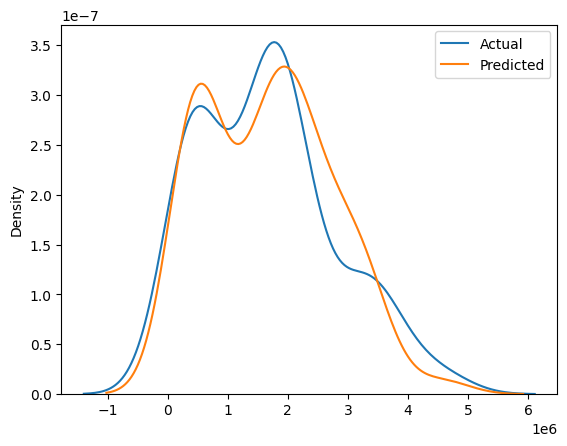

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model Decision Tree Regression
print('Decision Tree Regression')
DTreeReg_train = DTreeReg.score(x_train,y_train)*100
DTreeReg_test = DTreeReg.score(x_test, y_test)*100

#Evaluasi kinerja metode Random Forest Regressor dengan membagi data sampel menjadi 10 lipatan secara acak.
DTreeReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_score = cross_val_score(DTreeReg,x,y,cv=DTreeReg_cv)

print('Train : ',DTreeReg_train)
print('Test  : ',DTreeReg_test, '\n')
print('Rata-rata Cross Validation Score Adalah',np.round(np.mean(DTreeReg_score)*100,2))

Decision Tree Regression
Train :  100.0
Test  :  73.21934331853251 

Rata-rata Cross Validation Score Adalah 64.39


**Hyperparameter Tuning**

In [ ]:
DTreeReg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
param_grid = {'splitter' : ['best', 'random'],
              'max_depth': np.arange(1,11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'max_features':['auto','log2','sqrt',None]}

DTreeReg_tuning = DecisionTreeRegressor()

DTreeReg_search = RandomizedSearchCV(DTreeReg_tuning, param_grid, cv = 10, scoring='r2')

DTreeReg_best_model = DTreeReg_search.fit(x_train, y_train)
print('Parameter Optimal', DTreeReg_best_model.best_params_)
print('Skor Terbaik Adalah {}'.format(DTreeReg_best_model.best_score_))

Parameter Optimal {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 10}
Skor Terbaik Adalah 0.8216492242664462


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

**Fit New Model**

In [ ]:
DTreeReg_model = DecisionTreeRegressor(splitter= 'best', min_samples_split= 8, min_samples_leaf= 5, max_features= 'auto', max_depth= 2, random_state= 0)
DTreeReg_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=2, max_features='auto', min_samples_leaf=5,
                      min_samples_split=8, random_state=0)

In [ ]:
ypred_DTreeReg_model = sc.inverse_transform(DTreeReg_model.predict(x_test).reshape(-1,1))
ypred_DTreeReg_model = pd.DataFrame(ypred_DTreeReg_model)
ypred_DTreeReg_model.tail()

,0
63,4.849200e+05
64,1.966208e+06
65,1.966208e+06
66,1.966208e+06
67,1.966208e+06


<ipython-input-87-2b56da9fed3b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-87-2b56da9fed3b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_DTreeReg_model,hist=False,label='Predicted')


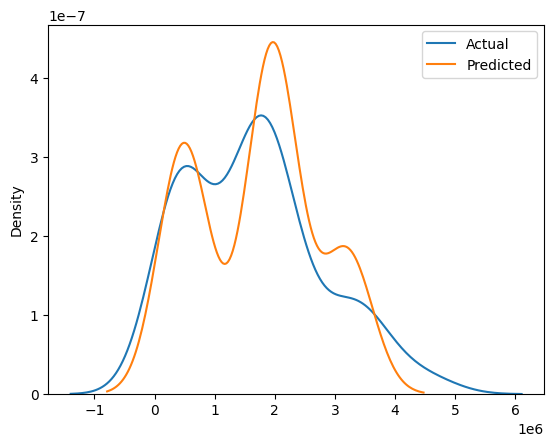

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_DTreeReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model Decision Tree Regression
print('Decision Tree Regression')
DTreeReg_model_train = DTreeReg_model.score(x_train,y_train)*100
DTreeReg_model_test = DTreeReg_model.score(x_test, y_test)*100

#Evaluasi kinerja metode Random Forest Regressor dengan membagi data sampel menjadi 10 lipatan secara acak.
DTreeReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_model_score = cross_val_score(DTreeReg_model,x,y,cv=DTreeReg_model_cv)

print('Train : ',DTreeReg_model_train)
print('Test  : ',DTreeReg_model_test, '\n')
print('Rata-rata Cross Validation Score Adalah',np.round(np.mean(DTreeReg_model_score)*100,2))

Decision Tree Regression
Train :  84.68468800789897
Test  :  81.42164309777542 

Rata-rata Cross Validation Score Adalah 78.52


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Model regresi Decision Tree yang telah menggunakan hasil penyetelan hiperparameter menunjukkan bahwa kinerjanya lebih seimbang antara data pelatihan dan data pengujian.

**K-Neighbors Regression**


KNN Regressor adalah algoritma untuk membangun model regresi yang menggunakan nilai rata-rata atau median dari k tetangga untuk memprediksi elemen target.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNNReg = KNeighborsRegressor(n_neighbors=1)
KNNReg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
ypred_KNNReg = sc.inverse_transform(KNNReg.predict(x_test).reshape(-1,1))
y_pred_KNNReg = pd.DataFrame(ypred_KNNReg)
y_pred_KNNReg.tail()

,0
63,4.256516e+05
64,1.783884e+06
65,4.178500e+06
66,1.826944e+06
67,1.455769e+06


<ipython-input-91-0c34c4da48c7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-91-0c34c4da48c7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_KNNReg,hist=False,label='Predicted')


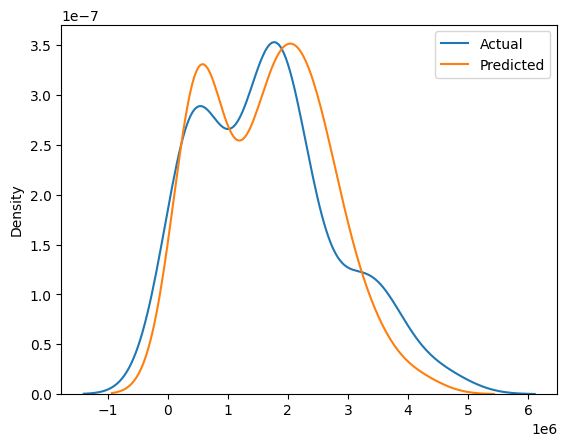

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_KNNReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model K-Nearest Neighbors Regression
print('K-Nearest Neighbors Regression')
KNNReg_train = KNNReg.score(x_train,y_train)*100
KNNReg_test = KNNReg.score(x_test, y_test)*100

#Evaluasi kinerja metode Random Forest Regressor dengan membagi data sampel menjadi 10 lipatan secara acak.
KNNReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_score = cross_val_score(KNNReg,x,y,cv=KNNReg_cv)

print('Train : ',KNNReg_train)
print('Test  : ',KNNReg_test, '\n')
print('Rata-rata Cross Validation Score Adalah',np.round(np.mean(KNNReg_score)*100,2))

K-Nearest Neighbors Regression
Train :  100.0
Test  :  86.62185171553706 

Rata-rata Cross Validation Score Adalah 71.02


**Hyperparameter Tuning**

In [ ]:
KNNReg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 10)}

KNNReg_tuning = KNeighborsRegressor()

KNNReg_search = GridSearchCV(KNNReg_tuning, param_grid, cv=10, scoring='r2')

KNNReg_best_model = KNNReg_search.fit(x_train, y_train)
print('Parameter OPtimal', KNNReg_best_model.best_params_)
print('Skor Terbaik Adalah {}'.format(KNNReg_best_model.best_score_))

Parameter OPtimal {'n_neighbors': 3}
Skor Terbaik Adalah 0.8140455477131845


**Fit New Model**

In [ ]:
KNNReg_model = KNeighborsRegressor(n_neighbors= 3)
KNNReg_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
ypred_KNNReg_model = sc.inverse_transform(KNNReg_model.predict(x_test).reshape(-1,1))
ypred_KNNReg_model = pd.DataFrame(ypred_KNNReg_model)
ypred_KNNReg_model.tail()

,0
63,4.901651e+05
64,1.896004e+06
65,3.117505e+06
66,2.037919e+06
67,1.721345e+06


<ipython-input-97-498191c3586c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-97-498191c3586c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_KNNReg_model,hist=False,label='Predicted')


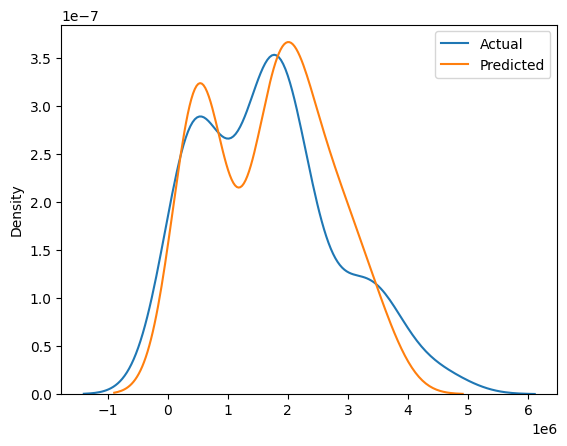

In [ ]:
#Prediksi Visualisasi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_KNNReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Periksa akurasi pengujian dan pelatihan model K-Nearest Neighbors Regression
print('K-Nearest Neighbors Regression')
KNNReg_model_train = KNNReg_model.score(x_train,y_train)*100
KNNReg_model_test = KNNReg_model.score(x_test, y_test)*100

#Evaluasi kinerja metode Random Forest Regressor dengan membagi data sampel menjadi 10 lipatan secara acak.
KNNReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_model_score = cross_val_score(KNNReg_model,x,y,cv=KNNReg_model_cv)

print('Train : ',KNNReg_model_train)
print('Test  : ',KNNReg_model_test, '\n')
print('Rata-rata Cross Validation Score Adalah',np.round(np.mean(KNNReg_model_score)*100,2))

K-Nearest Neighbors Regression
Train :  89.6868897055617
Test  :  86.28672507954892 

Rata-rata Cross Validation Score Adalah 77.2


Setelah penyetelan hiperparameter, model baru tidak cenderung mengalami overfitting lagi.

**5. Model Evaluation**

Evaluasi di bawah ini dilakukan menggunakan mean absolute error, mean squared error, dan r2-score. Semakin kecil mean absolute error dan mean squared error, namun semakin besar r2-score, maka algoritma tersebut semakin baik.

1. R2-score (koefisien determinasi) adalah fungsi skor regresi yang merepresentasikan proporsi varian untuk item (tanaman) dalam model regresi. R2-score menunjukkan seberapa baik termin (titik data) cocok dengan kurva atau garis.

2. Mean absolute error (MAE) merupakan rata-rata dari selisih absolut antara nilai aktual dan nilai prediksi dalam dataset. Ini mengukur rata-rata residual dalam dataset.

3. Mean Squared Error (MSE) merupakan rata-rata dari selisih kuadrat antara nilai asli dan nilai prediksi dalam dataset. Ini mengukur varian residual.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg_model)]
results.loc['Random Forest']=[r2_score(sc.inverse_transform(y_test),ypred_RFReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_RFReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),y_pred_RFReg)]
results.loc['Gradient Boosting']=[r2_score(sc.inverse_transform(y_test),ypred_GBReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_GBReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_GBReg_model)]
results.loc['SVR']=[r2_score(sc.inverse_transform(y_test),ypred_SVReg_model)*100,
                    mean_absolute_error(sc.inverse_transform(y_test),ypred_SVReg_model),
                    mean_squared_error(sc.inverse_transform(y_test),ypred_SVReg_model)]
results.loc['Decision Tree']=[r2_score(sc.inverse_transform(y_test),ypred_DTreeReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_DTreeReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),ypred_DTreeReg_model)]
results.loc['K-Neighbors']=[r2_score(sc.inverse_transform(y_test),ypred_KNNReg_model)*100,
                            mean_absolute_error(sc.inverse_transform(y_test),ypred_KNNReg_model),
                            mean_squared_error(sc.inverse_transform(y_test),ypred_KNNReg_model)]

#Mengurutkan model berdasarkan R2-score.
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Linear Regression,86.895666,261049.168107,160199780301.228729
Random Forest,86.377240,224668.555252,177505334097.156494
K-Neighbors,86.286725,269658.437076,167644049255.577728
Gradient Boosting,86.208342,265741.634590,168602274312.363312
SVR,84.193876,284771.942122,193229017933.827148
Decision Tree,81.421643,281254.415963,227119415141.265686


In [ ]:
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg_model)]
results.loc['Random Forest']=[r2_score(sc.inverse_transform(y_test),ypred_RFReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_RFReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),y_pred_RFReg)]

#Mengurutkan model berdasarkan R2-score.
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Linear Regression,86.895666,261049.168107,160199780301.228729
Random Forest,86.377240,224668.555252,177505334097.156494
